<a href="https://colab.research.google.com/github/kaikai23/Covid19-Group15-BigDataAnalytics/blob/main/Covid_19Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**Loading the Covid-19 Dataset:**

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")
df.head()

iso_code continent  ... life_expectancy human_development_index
0      AFG      Asia  ...           64.83                   0.511
1      AFG      Asia  ...           64.83                   0.511
2      AFG      Asia  ...           64.83                   0.511
3      AFG      Asia  ...           64.83                   0.511
4      AFG      Asia  ...           64.83                   0.511

[5 rows x 59 columns]

# **Data Processng/Cleaning**
On December 15, 2020, the date when the database showed the first people in the world to receive the COVID-19 vaccine was chosen as the starting point for the observation of the data for the analysis of the vaccine on the epidemic. When performing analyses related to vaccines, data prior to December 15, 2020 were not considered because there were no records of vaccination prior to that date. Subsequently, all data where the number of people vaccinated was blank were given a 0. <br/>It is important to note that there are two concepts in the database, the number of vaccines owned by the country or region and the number of people vaccinated in the country or region. In the early days, there were cases where countries or regions had vaccines but did not vaccinate the masses.<br/>In the dataset, smoothed data such as smoothed new cases and smoothed new deaths are calculated as the average of the last 7 days. For countries that don't report testing data and vaccination data on a daily basis, they are assumed to changed equally on a daily basis over any periods in which no data was reported. This produces a complete series of daily figures, which is then averaged over a rolling 7-day window. Positive rate is the share of COVID-19 tests that are positive, given as a rolling 7-day average, which is the inverse of tests per case.<br/>

# **Exploratory Data Analysis**

# **Model building**

# **Visualization and Report Findings**

**Number of valid values for each field(column):**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93740 entries, 0 to 93739
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               93740 non-null  object 
 1   continent                              89305 non-null  object 
 2   location                               93740 non-null  object 
 3   date                                   93740 non-null  object 
 4   total_cases                            90755 non-null  float64
 5   new_cases                              90754 non-null  float64
 6   new_cases_smoothed                     89742 non-null  float64
 7   total_deaths                           80800 non-null  float64
 8   new_deaths                             80958 non-null  float64
 9   new_deaths_smoothed                    89742 non-null  float64
 10  total_cases_per_million                90270 non-null  float64
 11  ne

**Statistics of this dataset:**

In [4]:
df.describe()

total_cases     new_cases  ...  life_expectancy  human_development_index
count  9.075500e+04  9.075400e+04  ...     89013.000000             84632.000000
mean   9.626804e+05  6.074791e+03  ...        73.233876                 0.727675
std    6.637316e+06  3.861324e+04  ...         7.560899                 0.150396
min    1.000000e+00 -3.486670e+05  ...        53.280000                 0.394000
25%    1.114000e+03  2.000000e+00  ...        67.920000                 0.602000
50%    1.231200e+04  7.200000e+01  ...        74.620000                 0.748000
75%    1.298900e+05  7.930000e+02  ...        78.740000                 0.848000
max    1.729871e+08  1.498126e+06  ...        86.750000                 0.957000

[8 rows x 54 columns]

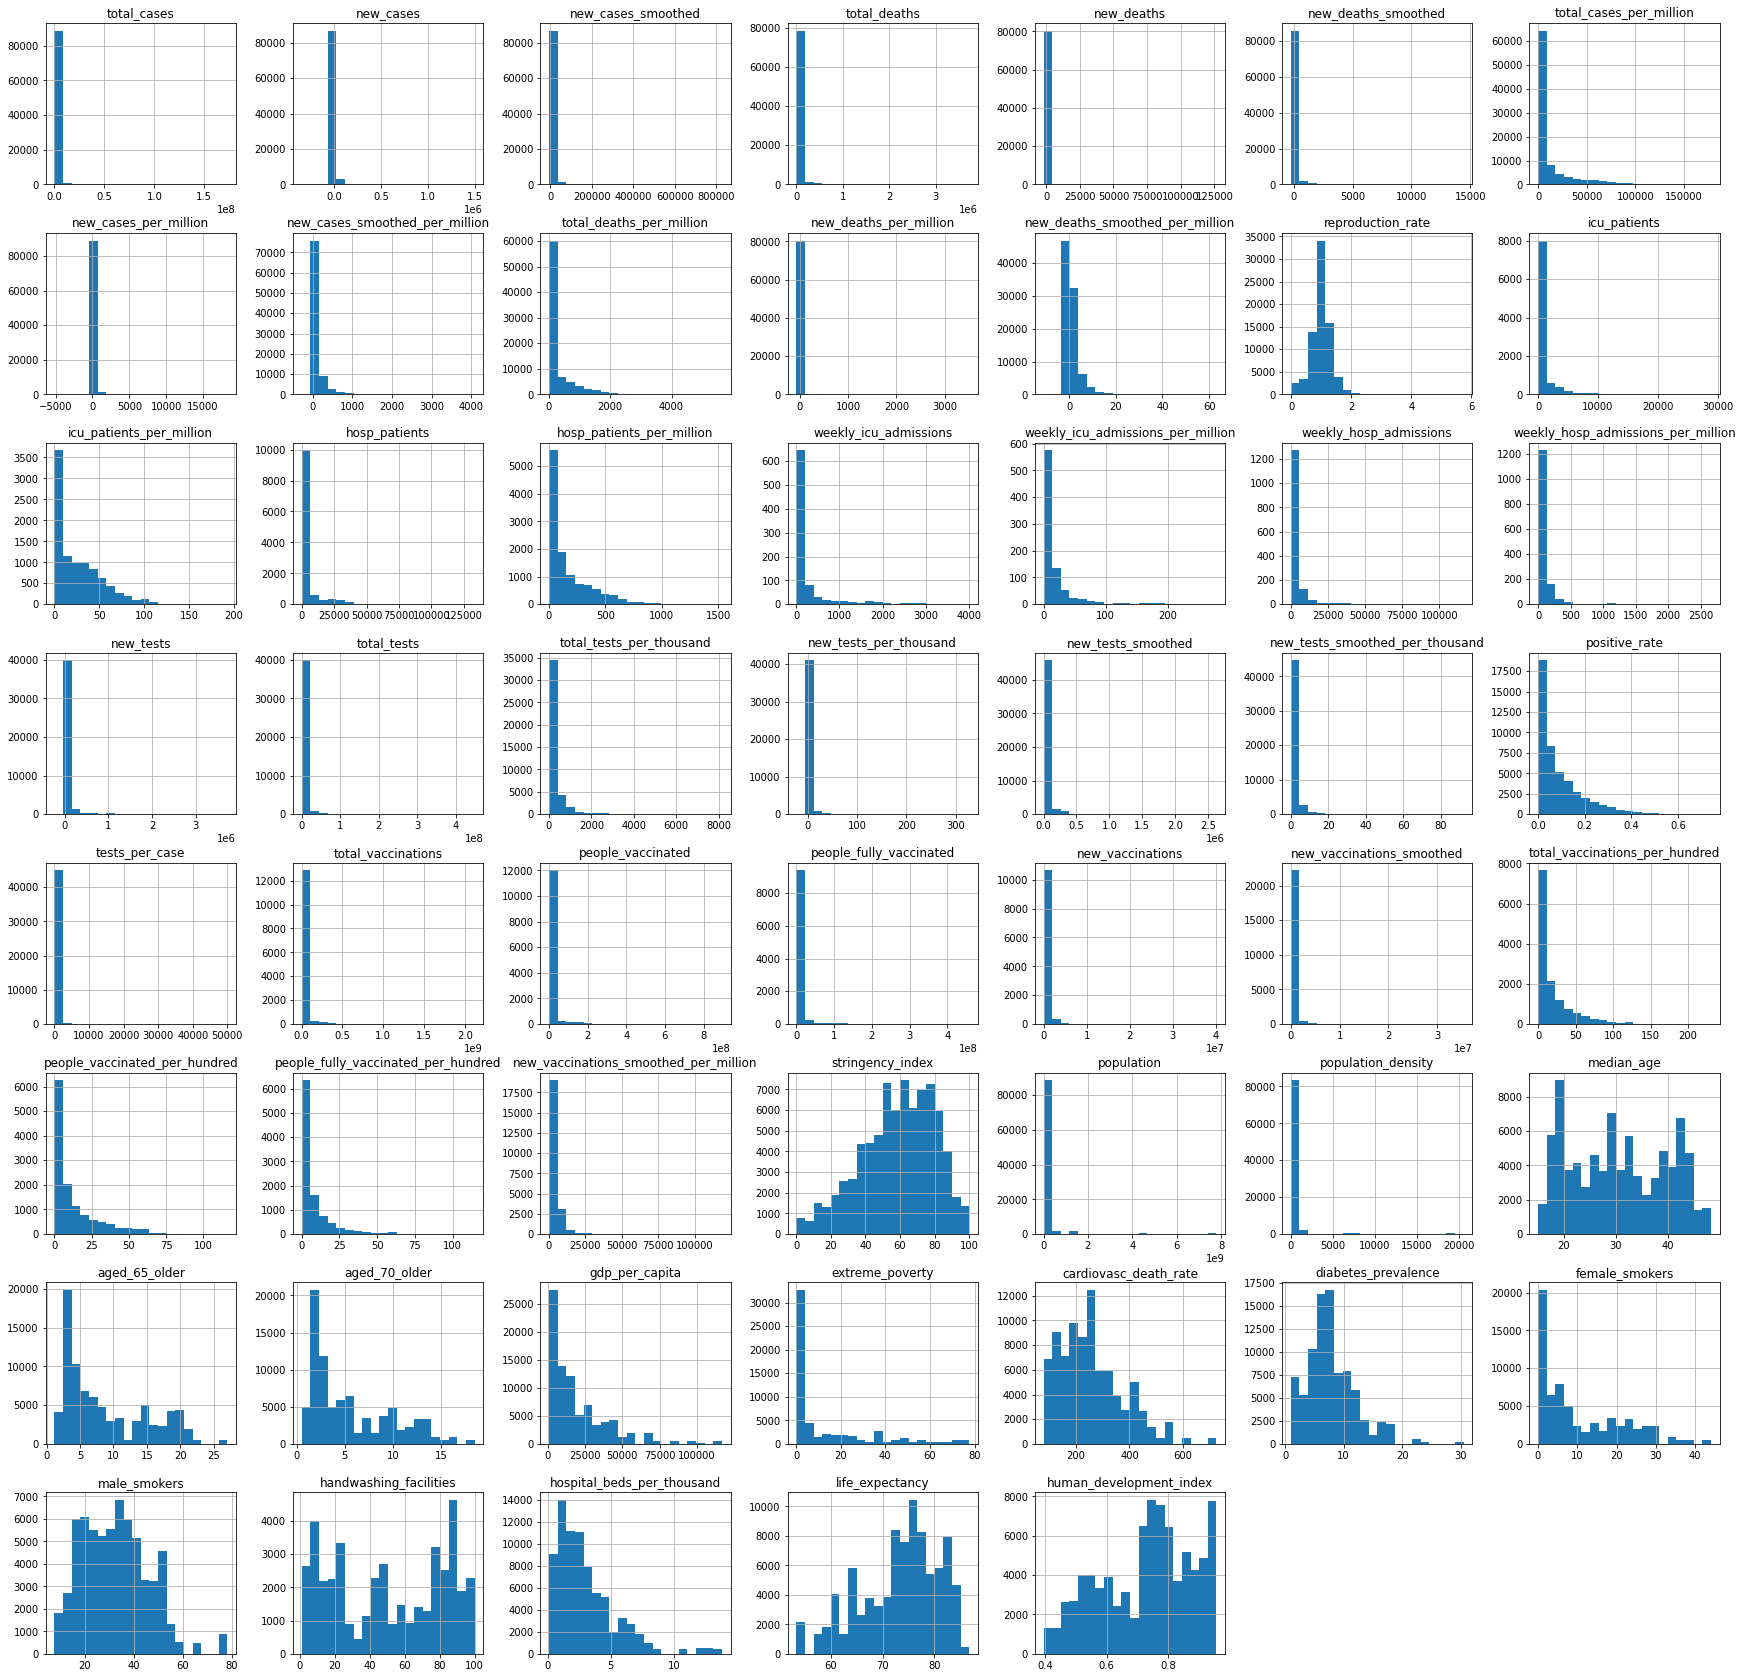

In [5]:
df.hist(bins=20, figsize=(30,30))
plt.show()

**Number of records for each location:**

In [21]:
iso_dic={}
for i in range(len(df)):
  if df['location'][i] in iso_dic: iso_dic[df['location'][i]]=iso_dic[df['location'][i]]+1
  else: iso_dic[df['location'][i]]=1
iso_dic

{'Afghanistan': 468,
 'Africa': 479,
 'Albania': 467,
 'Algeria': 467,
 'Andorra': 461,
 'Angola': 443,
 'Anguilla': 114,
 'Antigua and Barbuda': 450,
 'Argentina': 522,
 'Armenia': 462,
 'Aruba': 68,
 'Asia': 501,
 'Australia': 497,
 'Austria': 467,
 'Azerbaijan': 462,
 'Bahamas': 447,
 'Bahrain': 468,
 'Bangladesh': 460,
 'Barbados': 446,
 'Belarus': 464,
 'Belgium': 488,
 'Belize': 440,
 'Benin': 447,
 'Bermuda': 142,
 'Bhutan': 457,
 'Bolivia': 452,
 'Bonaire Sint Eustatius and Saba': 1,
 'Bosnia and Herzegovina': 458,
 'Botswana': 433,
 'Brazil': 466,
 'British Virgin Islands': 8,
 'Brunei': 454,
 'Bulgaria': 455,
 'Burkina Faso': 453,
 'Burundi': 432,
 'Cambodia': 496,
 'Cameroon': 457,
 'Canada': 497,
 'Cape Verde': 443,
 'Cayman Islands': 162,
 'Central African Republic': 448,
 'Chad': 444,
 'Chile': 469,
 'China': 501,
 'Colombia': 457,
 'Comoros': 402,
 'Congo': 448,
 'Cook Islands': 8,
 'Costa Rica': 457,
 "Cote d'Ivoire": 452,
 'Croatia': 467,
 'Cuba': 451,
 'Curacao': 69,


**The list of countries(and number of days recorded) where the highest infection rates ever exceeded 10%:**

In [42]:
countries={}
for i in range(len(df)):
  if df['total_cases_per_million'][i]>100000 and df['location'][i] not in countries:
    countries[df['location'][i]]=len(df[df['location']==df['location'][i]])
print(countries)

{'Andorra': 461, 'Bahrain': 468, 'Czechia': 462, 'Lithuania': 463, 'Luxembourg': 468, 'Maldives': 455, 'Montenegro': 446, 'San Marino': 465, 'Serbia': 466, 'Seychelles': 449, 'Slovenia': 490, 'Sweden': 491, 'United States': 502}


**A concrete case study: United States**

In [44]:
df_us=df[df['location']=='United States']
len(df_us)

502

([], <a list of 0 Text major ticklabel objects>)

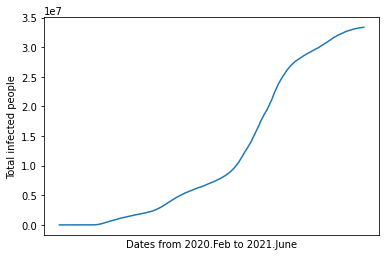

In [61]:
plt.plot(df_us['date'],df_us['total_cases'])
plt.xlabel('Dates from 2020.Feb to 2021.June')
plt.ylabel('Total infected people')
plt.xticks([])

([], <a list of 0 Text major ticklabel objects>)

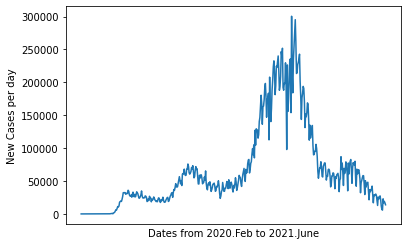

In [60]:
plt.plot(df_us['date'],df_us['new_cases'])
plt.xlabel('Dates from 2020.Feb to 2021.June')
plt.ylabel('New Cases per day')
plt.xticks([])